In [2]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('data/DataminingContest2009.Task2.Train.Inputs')
target = pd.read_csv('data/DataminingContest2009.Task2.Train.Targets')
df = df.merge(target, left_index=True, right_index=True)
df.rename(columns={'0':'fraud'}, inplace=True)
df.head()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-723,19,0,0,0,0,0,1,0
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1,0
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1,0
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1,0
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1,0


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Data columns (total 20 columns):
amount        99999 non-null float64
hour1         99999 non-null int64
state1        99998 non-null object
zip1          99999 non-null int64
custAttr1     99999 non-null int64
field1        99999 non-null int64
custAttr2     99999 non-null object
field2        99999 non-null int64
hour2         99999 non-null int64
flag1         99999 non-null int64
total         99999 non-null float64
field3        99999 non-null int64
field4        99999 non-null int64
indicator1    99999 non-null int64
indicator2    99999 non-null int64
flag2         99999 non-null int64
flag3         99999 non-null int64
flag4         99999 non-null int64
flag5         99999 non-null int64
fraud         99999 non-null int64
dtypes: float64(2), int64(16), object(2)
memory usage: 16.0+ MB


In [435]:
df.describe()

,amount,hour1,zip1,custAttr1,field1,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
count,99999.000000,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000
mean,26.976720,14.016050,544.309063,1.234568e+15,2.368264,0.405374,14.03053,0.419714,26.976720,368.757788,15.026200,0.113371,0.017850,0.556406,0.391394,0.013730,16.03750,0.026540
std,14.595024,5.415142,317.287693,2.140153e+04,0.998771,0.490967,5.40947,0.493515,14.595024,4151.207393,6.450303,0.317048,0.132407,0.496811,0.488065,0.116369,191.19551,0.160736
min,0.000000,0.000000,6.000000,1.234568e+15,0.000000,0.000000,0.00000,0.000000,0.000000,-26803.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,12.950000,11.000000,279.000000,1.234568e+15,2.000000,0.000000,11.00000,0.000000,12.950000,-2260.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
50%,25.900000,14.000000,535.000000,1.234568e+15,3.000000,0.000000,14.00000,0.000000,25.900000,1093.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000
75%,38.850000,18.000000,891.000000,1.234568e+15,3.000000,1.000000,18.00000,1.000000,38.850000,3517.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000
max,59.950000,23.000000,999.000000,1.234568e+15,4.000000,1.000000,23.00000,1.000000,59.950000,8169.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3278.00000,1.000000


#### right off the bat it looks like there were purchases entered as $0 -- these will likely need to be deleted, presumably owing to input error
#### it's also worth noting that 2.65 % of all transactions are fraud
#### who knows what our flags and indicators are but my suspicion is that indicator2 and flag4 have stronger correlation with fraud as their means are closest

In [436]:
df.isna().sum()

amount        0
hour1         0
state1        1
zip1          0
custAttr1     0
field1        0
custAttr2     0
field2        0
hour2         0
flag1         0
total         0
field3        0
field4        0
indicator1    0
indicator2    0
flag2         0
flag3         0
flag4         0
flag5         0
fraud         0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [12]:
df = df[df.amount != 0]
df.reset_index(drop=True, inplace=True)

In [156]:
#check that we can drop one or the other
df[df.amount != df.total]

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud


In [13]:
df.pop('total')

0        12.95
1        38.85
2        38.85
3        12.95
4        38.85
         ...  
98090    25.90
98091    31.08
98092    49.95
98093    11.01
98094    12.95
Name: total, Length: 98095, dtype: float64

In [441]:
df[df.hour1 != df.hour2]

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
76,38.85,7,OH,454,1234567890123525,3,brtjtphsbisqb@paradigmasset.com,0,8,0,-3166,8,0,0,1,1,0,2,0
109,34.97,8,VA,201,1234567890123557,3,mqbomhkvofshy@lycos.com,0,9,1,-1965,7,0,0,0,0,0,1,0
465,12.95,16,TX,761,1234567890123892,3,dvirbnkgkitlk2@aol.com,1,15,0,1065,15,0,0,1,1,0,1,0
467,49.95,16,GA,303,1234567890123893,2,vqzakxmdkigem@bellsouth.net,1,15,0,-6674,21,0,0,0,0,0,1,0
508,38.85,16,IN,474,1234567890123932,3,wjhmtjmxmskmp17@yahoo.com,1,17,0,2925,20,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97731,38.85,9,AL,357,1234567890161728,3,atgthpjcjcoww@ngc.com,1,10,1,4063,8,0,0,1,0,0,1,0
97866,49.95,12,AZ,852,1234567890197026,3,phpqriqrmubjz@hotmail.com,0,11,0,3926,9,1,0,1,1,0,2,0
97939,38.85,12,CA,941,1234567890197084,3,vtajtzawnxucb@yahoo.com,0,13,1,114,8,0,0,1,1,0,1,0
97943,38.85,12,FL,331,1234567890197087,2,yommholfyihtn99@aol.com,1,13,0,-4629,16,1,0,1,1,0,1,0


In [14]:
#df = df[df.hour1 == df.hour2]
df.pop('hour2')
df.rename(columns={'hour1':'hour'},inplace=True)
df.reset_index(drop=True, inplace=True)

/Library/Python/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [443]:
'''fig, ax = plt.subplots(figsize=(18, 9))
likes = df.groupby('state1').fraud.mean()
ax.set_title('Fraud by State', fontsize=25)
ax.set_xlabel('state', fontsize=18)
ax.set_ylabel('Percent of Fraudulent Transactions', fontsize=18, labelpad=25)
ax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)
ax.bar(likes.index, likes)
fig.savefig('visuals/fraudbystate.png')'''

"fig, ax = plt.subplots(figsize=(18, 9))\nlikes = df.groupby('state1').fraud.mean()\nax.set_title('Fraud by State', fontsize=25)\nax.set_xlabel('state', fontsize=18)\nax.set_ylabel('Percent of Fraudulent Transactions', fontsize=18, labelpad=25)\nax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)\nax.bar(likes.index, likes)\nfig.savefig('visuals/fraudbystate.png')"

In [15]:
df.pop('state1')

0        WA
1        WA
2        KY
3        CA
4        GA
         ..
98090    TX
98091    GA
98092    LA
98093    NY
98094    VA
Name: state1, Length: 98095, dtype: object

In [16]:
df['custAttr2'] = df['custAttr2'].apply(lambda s: s.split('@')[-1])
df.rename(columns={'custAttr2':'email', 'custAttr1':'account_id'},inplace=True)

/Library/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [446]:
e_dict = defaultdict()
email_counts = df.email.value_counts()
for count in set(email_counts):
    e_mask = email_counts[email_counts==count].index
    fraud_rate = df[df.email.isin(e_mask)].fraud.mean()
    e_dict[count] = fraud_rate

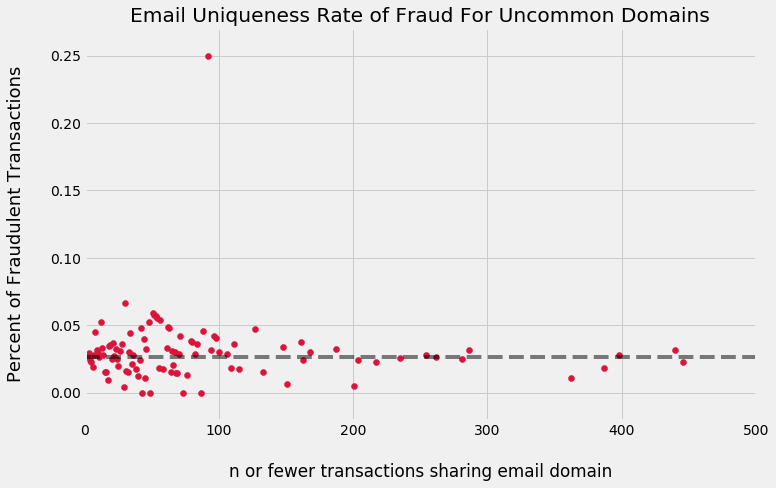

In [450]:
emails = np.array(sorted(e_dict.items()))
fig, ax = plt.subplots(figsize=(11,7))
ax.scatter(emails[:,0], emails[:,1], c='crimson')
ax.set_title('Email Uniqueness Rate of Fraud For Uncommon Domains')
ax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)
ax.set_xlim([0, 500])
ax.set_xlabel('n or fewer transactions sharing email domain', labelpad=25)
ax.set_ylabel('Percent of Fraudulent Transactions', fontsize=18, labelpad=25)
plt.tight_layout()
fig.savefig('visuals/emailuniqueness.png');

In [422]:
email_counts[email_counts==92]

clintmiller.com    92
Name: email, dtype: int64

In [58]:
df = df[df.email != 'clintmiller.com']
df.reset_index(drop=True, inplace=True)

In [17]:
df.pop('email')

0            comcast.net
1              zjyxs.net
2                aol.com
3          sbcglobal.net
4          bellsouth.net
              ...       
98090            msn.com
98091    ucxhcpouwmc.net
98092       xnzysnub.com
98093            aol.com
98094            aol.com
Name: email, Length: 98095, dtype: object

In [389]:
def simple_fields(df, field):
    d = defaultdict(list)
    categories = df[field].unique()
    for cat in categories:
        fm = df[df[field] == cat].fraud.mean()
        count = df[df[field] == cat].shape[0]
        if fm  == 0:
            d['legal'].append({cat:count})
        else:
            d['fraud'].append({cat:(round(fm, 5), count)})
    
    print (field)
    print ('FRAUD | Category : (fraud%, group size)')
    print (d['fraud']) 
    print ('LEGAL | Category : group size')
    print (d['legal'])
    return

In [60]:
df.head(1)

,amount,hour,account_id,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
0,12.95,0,1234567890123456,0,0,0,-723,19,0,0,0,0,0,1,0


In [394]:
fields = ['field1', 'field2', 'flag1', 'field4', 'indicator1', 'indicator2',
          'flag2', 'flag3', 'flag4', 'flag5']
#field3 is very messy so we'll discount for now
for f in fields:
    simple_fields(df, f)
    print ('')

field1
FRAUD | Category : (fraud%, group size)
[{0: (0.02765, 10921)}, {3: (0.02568, 56885)}, {2: (0.02663, 25352)}, {1: (0.02484, 2737)}]
LEGAL | Category : group size
[{4: 8}]

field2
FRAUD | Category : (fraud%, group size)
[{0: (0.02652, 57057)}, {1: (0.02556, 38846)}]
LEGAL | Category : group size
[]

flag1
FRAUD | Category : (fraud%, group size)
[{0: (0.02498, 54808)}, {1: (0.02767, 41095)}]
LEGAL | Category : group size
[]

field4
FRAUD | Category : (fraud%, group size)
[{19: (0.02315, 5055)}, {14: (0.02376, 2357)}, {23: (0.02639, 3524)}, {31: (0.00513, 195)}, {21: (0.02687, 4949)}, {24: (0.02814, 2843)}, {7: (0.02371, 7000)}, {9: (0.0281, 9750)}, {6: (0.02976, 5309)}, {10: (0.02961, 5302)}, {25: (0.02997, 2069)}, {17: (0.02268, 4674)}, {18: (0.0258, 5813)}, {16: (0.02494, 3970)}, {11: (0.02525, 3248)}, {20: (0.0264, 5417)}, {8: (0.02721, 8378)}, {22: (0.02424, 4497)}, {26: (0.02495, 1443)}, {32: (0.00694, 144)}, {29: (0.02963, 540)}, {13: (0.02505, 1836)}, {12: (0.02251, 2310)},

In [86]:
for col in df.columns[3:-1]:
    if len(df[col].value_counts()) > 2:
        print (col)

field1
field3
field4
flag5


In [61]:
def create_dummy_df(df, features):
    for feature in features:
        dummies = pd.get_dummies(df[feature], prefix=feature)
        df = df.drop(columns=feature).join(dummies.iloc[:,:-1])
    return df

In [162]:
dummy_df = create_dummy_df(df, ['field1','field4', 'flag5'])

In [144]:
field3 = df.field3.map(lambda n: .000001 if n==0 else n)
dummy_df['field3'] = np.log(field3)

In [145]:
dummy_df.field3.min()

-13.815510557964274

In [149]:
np.log(-1)

/Library/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


nan

### CREATE VALIDATION DATASET

In [163]:
dummy_df

,amount,hour,zip1,account_id,field2,flag1,field3,indicator1,indicator2,flag2,...,flag5_6,flag5_7,flag5_8,flag5_9,flag5_98,flag5_100,flag5_364,flag5_1434,flag5_1600,flag5_1643
0,12.95,0,986,1234567890123456,0,0,-723,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.85,0,980,1234567890123457,1,0,5497,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38.85,0,402,1234567890123458,1,0,-4420,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,12.95,0,958,1234567890123459,0,0,5010,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,38.85,0,300,1234567890123460,1,0,-4074,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98090,25.90,14,770,1234567890197180,1,0,3130,1,0,1,...,0,0,0,0,0,0,0,0,0,0
98091,31.08,14,313,1234567890197181,0,1,-8044,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98092,49.95,14,704,1234567890197182,0,0,393,1,0,1,...,0,0,0,0,0,0,0,0,0,0
98093,11.01,14,117,1234567890196488,1,1,4261,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [177]:
train_idx, test_idx, train_idx, test_idx = train_test_split(np.arange(df.shape[0]), df.fraud, test_size=30000, random_state=7, stratify=df.fraud)

In [181]:
train_idx.index

Int64Index([85141, 25370, 14369,  1438, 67860, 39573, 75000, 36117, 75485,
            96185,
            ...
            87726, 47996, 60430, 94161, 93720,  4630, 76623,  2663, 73005,
            13213],
           dtype='int64', length=68095)

In [182]:
test_df, train_df = dummy_df.iloc[test_idx.index], dummy_df.iloc[train_idx.index]

In [184]:
train_df[['amount', 'fraud']].describe()

,amount,fraud
count,68095.000000,68095.000000
mean,27.461038,0.026169
std,14.224558,0.159640
min,9.500000,0.000000
25%,12.950000,0.000000
50%,31.080000,0.000000
75%,38.850000,0.000000
max,59.950000,1.000000


In [185]:
test_df.to_pickle('data/dummy_validation.pkl')
train_df.to_pickle('data/dummy_train.pkl')

In [186]:
test_df, train_df = df.iloc[test_idx.index], df.iloc[train_idx.index]
test_df.to_csv('data/validation.csv', index=False)
train_df.to_csv('data/train.csv', index=False)

In [80]:
train_df.field2.value_counts()

0    58390
1    39705
Name: field2, dtype: int64

In [81]:
train_df.head()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-723,19,0,0,0,0,0,1,0
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1,0
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1,0
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1,0
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1,0


In [192]:
df.head()

,amount,hour,zip1,custAttr1,field1,custAttr2,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
0,12.95,0,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,-723,19,0,0,0,0,0,1,0
1,38.85,0,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,5497,14,1,0,0,1,0,1,0
2,38.85,0,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,-4420,23,0,0,1,1,0,1,0
3,12.95,0,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,5010,31,0,0,1,0,0,1,0
4,38.85,0,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,-4074,21,0,0,1,0,0,1,0


<BarContainer object of 904 artists>

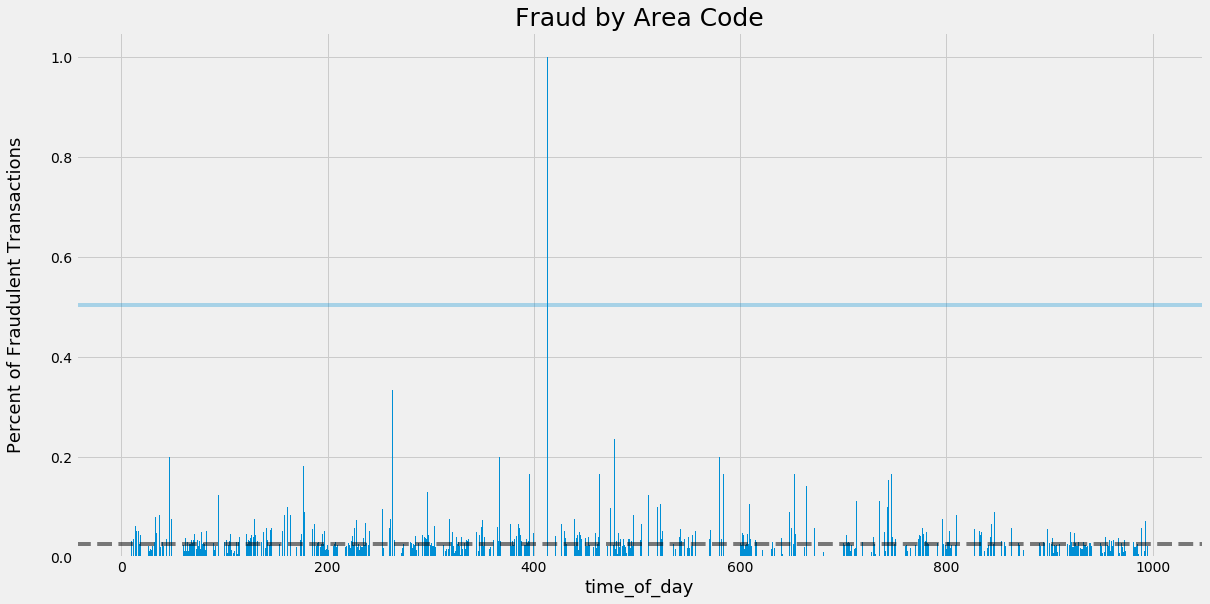

In [465]:
fig, ax = plt.subplots(figsize=(18, 9))
likes = df.groupby('zip1').fraud.mean()
ax.set_title('Fraud by Area Code', fontsize=25)
ax.set_xlabel('Area Code', fontsize=18)
ax.set_ylabel('Percent of Fraudulent Transactions', fontsize=18, labelpad=25)
ax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)
ax.axhline(df.fraud.mean() + df.fraud.std()*3, alpha=.3)
ax.bar(likes.index, likes)
#fig.savefig('visuals/fraudbyhour.png')

In [462]:
df[df.zip1 == 413]

,amount,hour,zip1,account_id,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag4,flag5,fraud
177,12.95,10,413,1234567890123622,1,0,0,-3969,10,0,0,0,0,1,1


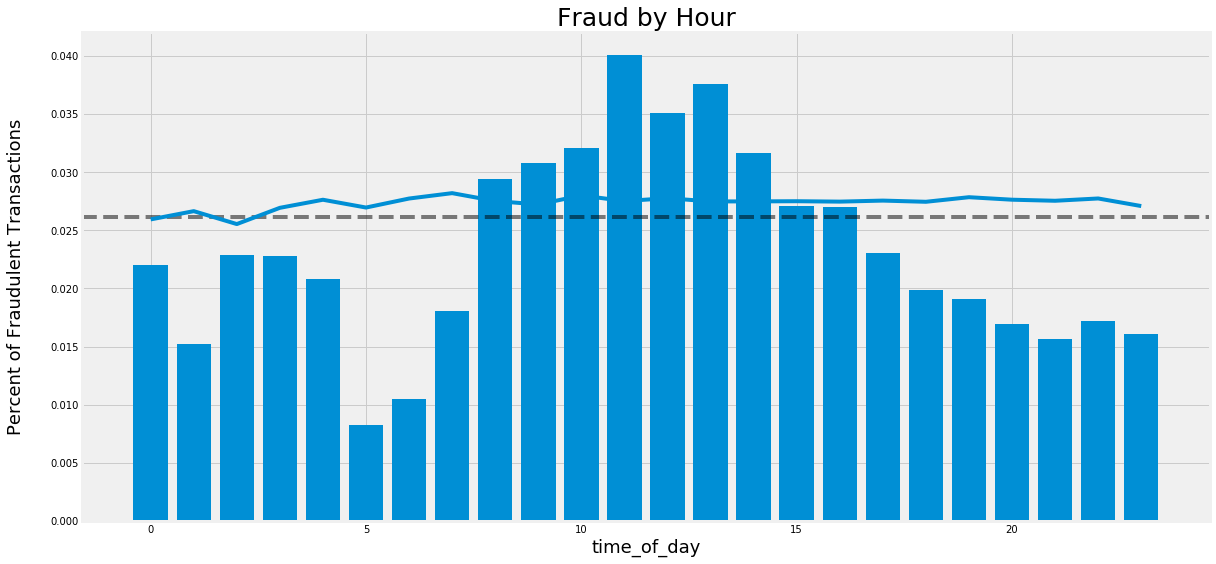

In [51]:
fig, ax = plt.subplots(figsize=(18, 9))
likes = df.groupby('hour').fraud.mean()
ax.set_title('Fraud by Hour', fontsize=25)
ax.set_xlabel('time_of_day', fontsize=18)
ax.set_ylabel('Percent of Fraudulent Transactions', fontsize=18, labelpad=25)
ax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)
ax.bar(likes.index, likes)
ax.plot(likes.index, df.groupby('hour').amount.mean()/1000)
#fig.savefig('visuals/fraudbyhour.png')

In [219]:
user_mask = df.custAttr1.value_counts()[(df.custAttr1.value_counts() > 1)].index

In [231]:
single_purchases = df[df.custAttr1.isin(user_mask)]
multiple_purchases = df[~df.custAttr1.isin(user_mask)]
single_counts = single_purchases.shape[0]
multiple_counts = multiple_purchases.shape[0]
single_prob = single_purchases.fraud.mean()
multi_prob = multiple_purchases.fraud.mean()

In [232]:
pd.DataFrame(data={'Number of Purchases': [single_counts, multiple_counts],
              'Percent of Fraud': [single_prob, multi_prob]},
             index=['Single Transaction', 'Multiple Transactions'])

,Number of Purchases,Percent of Fraud
Single Transaction,39833,0.026812
Multiple Transactions,56070,0.025647


In [319]:
email_counts[email_counts==92]

clintmiller.com    92
Name: email, dtype: int64

In [17]:
df

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-723,19,0,0,0,0,0,1,0
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1,0
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1,0
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1,0
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.90,14,TX,770,1234567890197180,3,gbkrvisrrfshi1@msn.com,1,14,0,25.90,3130,17,1,0,1,1,0,1,0
99995,31.08,14,GA,313,1234567890197181,2,owdybxinfiqla@ucxhcpouwmc.net,0,14,1,31.08,-8044,10,0,0,0,0,0,1,0
99996,49.95,14,LA,704,1234567890197182,0,vnmhghmwnxhso@xnzysnub.com,0,14,0,49.95,393,18,1,0,1,0,0,1,0
99997,11.01,14,NY,117,1234567890196488,3,uphjcxjkubtrw@aol.com,1,14,1,11.01,4261,11,0,0,1,1,0,1,0


In [5]:
fraud_df = df[df.fraud==1]

In [23]:
multi_fraud = fraud_df.groupby('custAttr2').fraud.size().sort_values(ascending=False)[:67]
single_fraud = fraud_df.groupby('custAttr2').fraud.size().sort_values(ascending=False)[67:]

In [24]:
multi_fraud.sum()

184

In [29]:
multi_trans = df[df.custAttr2.isin(multi_fraud.index)].groupby('custAttr2').fraud.size()

In [41]:
only_fraud = (multi_fraud.sort_index() / multi_trans.sort_index()).sort_values(ascending=False)[:5].index
some_fraud = (multi_fraud.sort_index() / multi_trans.sort_index()).sort_values(ascending=False)[5:].index

In [43]:
multi_trans[multi_trans.index.isin(only_fraud)]

custAttr2
fxdliekeldfhr@msn.com           2
icmiphsklejrw@myway.com         2
oyfeixpxvxoef@ayhgykmfxy.com    3
vaxcocewyvtkq@yahoo.com         2
wyiqumfcvgggs@yahoo.com         2
Name: fraud, dtype: int64

In [45]:
multi_trans[multi_trans.index.isin(some_fraud)]

custAttr2
adnjwourqajtm@comcast.net            18
antihyknzxmva@choicedata.com        247
cajyygxbikfiq32@yahoo.com             5
cpvafrzpgzyjc517@aol.com              3
dcqfxbdxumflo69@verizon.net           5
                                   ... 
ydglbdruwfxie0611@houston.rr.com     18
yifndymvntkpn@bellsouth.net           5
zrrlttgunoehx@dysnet.com             15
zsxbringavcae@cbbtr.com              82
zwzihwgzxohnq@cbbtr.com             262
Name: fraud, Length: 62, dtype: int64

In [102]:
df.field3.unique().shape

(16881,)

In [99]:
df[df.field3 == -185]

,amount,hour,account_id,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
210,38.85,11,1234567890123653,0,1,1,-185,7,0,0,0,0,0,1,0
488,12.95,16,1234567890123912,2,1,1,-185,18,0,0,1,1,0,1,0
498,12.95,16,1234567890123922,3,1,1,-185,18,0,0,1,1,0,1,0
918,12.95,8,1234567890123912,2,1,1,-185,18,0,0,1,1,0,1,0
1568,12.95,21,1234567890124853,2,1,1,-185,18,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88986,10.36,13,1234567890123922,3,1,1,-185,18,0,0,1,1,0,1,0
92828,10.36,17,1234567890123922,3,1,1,-185,18,0,0,1,1,0,1,0
92912,10.36,19,1234567890123922,3,1,1,-185,18,0,0,1,1,0,1,0
92939,10.36,19,1234567890123922,3,1,1,-185,18,0,0,1,1,0,1,0


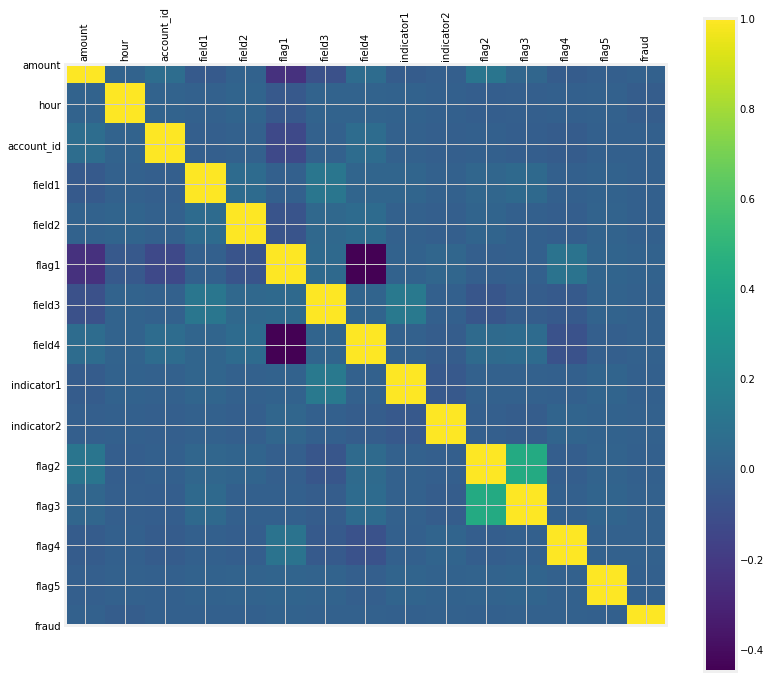

In [115]:
columns=df.columns
fig, ax = plt.subplots(figsize=(12, 12))
corr_map = ax.matshow(df.corr())
ax.set_xticks(range(len(columns)))
ax.set_yticks(range(len(columns)))
ax.set_xticklabels(columns, rotation=90)
ax.set_yticklabels(columns)
cb = fig.colorbar(corr_map, ax=ax);

In [21]:
no_trans = df.groupby('account_id').fraud.size()

In [22]:
multi = df['account_id'].isin(no_trans[no_trans > 1].index).astype(int)

In [265]:
mult_df = df[multi==1]
solo_df = df[multi==0]

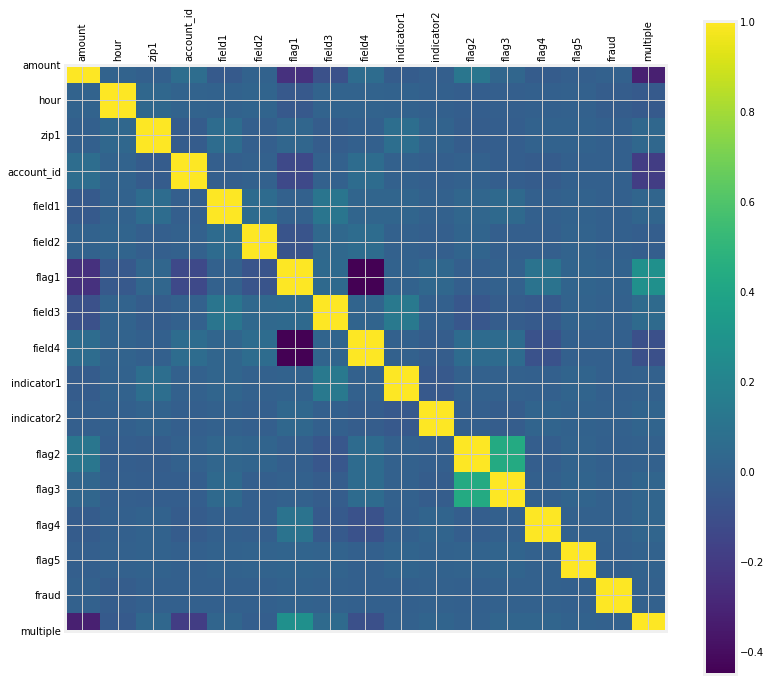

In [26]:
'''columns=df.columns
fig, ax = plt.subplots(figsize=(12, 12))
corr_map = ax.matshow(df.corr())
ax.set_xticks(range(len(columns)))
ax.set_yticks(range(len(columns)))
ax.set_xticklabels(columns, rotation=90)
ax.set_yticklabels(columns)
cb = fig.colorbar(corr_map, ax=ax);'''

In [27]:
100000/98

1020.4081632653061

In [271]:
total_fraud_per_hour = df.groupby('hour').fraud.sum() / 98
print (total_fraud_per_hour[:8].sum())
print (total_fraud_per_hour[8:18].sum())
print (total_fraud_per_hour[18:].sum())

1.7653061224489797
19.22448979591837
5.204081632653061


In [270]:
mult_fraud_per_hour = mult_df.groupby('hour').fraud.sum() / 98
print (mult_fraud_per_hour[:8].sum())
print (mult_fraud_per_hour[8:18].sum())
print (mult_fraud_per_hour[18:].sum())

0.9693877551020408
8.10204081632653
2.0816326530612246


3575.0

In [253]:
cb = pd.DataFrame(data=[[0.0, -22.50], [-27.50, -15.0]], index=['Legal', 'Fraud'], columns=['Legal', 'Fraud'])
cb.index.name = 'actual'
cb.columns.name = 'predicted'

In [272]:
cb

predicted,Legal,Fraud
actual,,
Legal,0.0,-25.0
Fraud,-27.5,-15.0


In [252]:
from sklearn.metrics import recall_score, f1_score, precision_score

In [249]:
def base_cost(n):
    dly_sales = [[994, 0],[n*6, 26-(n*6)]]
    fraud = np.zeros(1020)
    fraud[:26] = 1
    preds = fraud.copy()
    preds[:n*6] = 0
    return dly_sales, fraud, preds

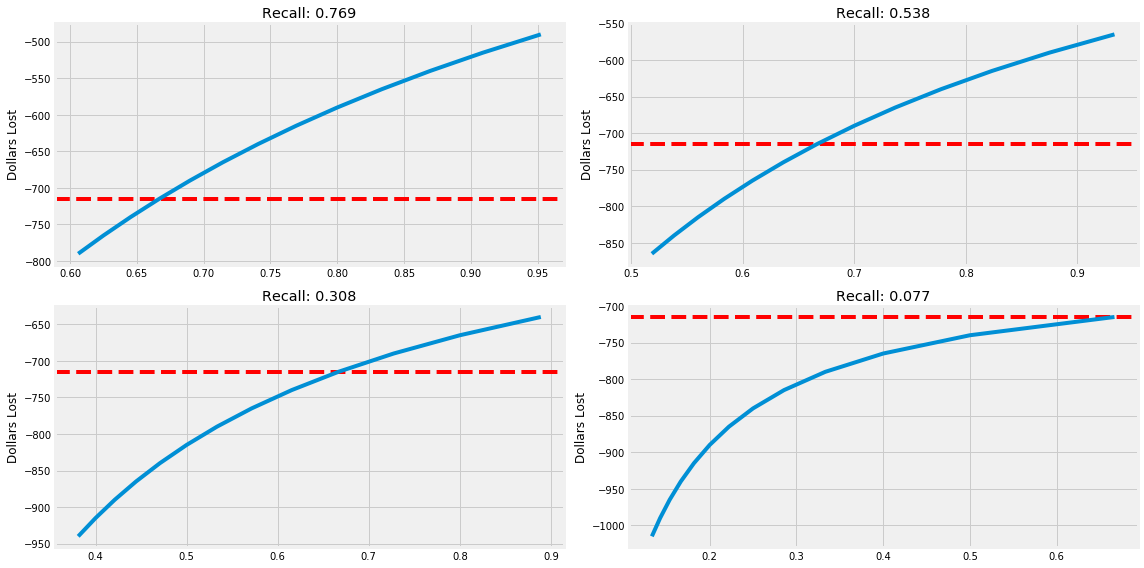

In [254]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
for i, ax in enumerate(axs.flatten()):
    dly_sales, fraud, preds = base_cost(i+1)
    loss, precision = [], []
    for n in range(1, 14):
        dly_sales[0][0] -= 1
        dly_sales[0][1] += 1
        preds[-n:] = 1
        est = (dly_sales*cb.values).sum()
        loss.append(est)
        precision.append(precision_score(fraud, preds))
        if est < - 715:
            opt = precision_score(fraud, preds)
        
    ax.axhline(-715, linestyle='--', color='r')
    ax.plot(precision, loss)
    ax.set_ylabel('Dollars Lost')
    #ax.set_xlabel('Precision Score')
    ax.set_title('Recall: %.3f'%recall_score(fraud, preds))

fig.tight_layout()
plt.savefig('visuals/Recall_Precision.png');

In [262]:
(mult_df.groupby('hour').size() / 98).sum()

417.53061224489795

In [263]:
mult_df

,amount,hour,zip1,account_id,field1,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud,multiple
5,12.95,0,852,1234567890123461,3,0,1,-2753,24,0,0,1,1,0,1,0,1
6,11.01,0,950,1234567890123462,3,0,0,2429,14,0,0,0,0,0,1,0,1
10,12.95,0,950,1234567890123462,3,0,0,2429,14,0,0,0,0,0,1,0,1
13,12.95,0,750,1234567890123468,3,0,1,5195,9,0,0,1,1,0,1,0,1
19,12.95,1,601,1234567890123474,2,0,1,809,7,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98073,25.90,14,958,1234567890157691,3,0,1,2186,9,0,0,1,0,0,1,0,1
98078,33.67,14,366,1234567890197161,3,1,1,4177,6,0,0,1,1,0,2,0,1
98085,12.95,14,787,1234567890137953,3,0,1,3357,10,1,0,1,1,0,2,0,1
98088,10.36,14,953,1234567890194145,3,1,1,5169,8,0,0,0,0,0,1,0,1


In [264]:
40918/98

417.53061224489795